# Simple California Demo 2.0



This notebook shows how to use build a hierarchical clustering of the input features and use it to explain a single instance. This is a good way to explain a single instance when the number of input features is large.
When given a balanced partition tree PartitionExplainer has $O(M^2)$ runtime, where $M$ is the number of input features. This is much better than the $O(2^M)$ runtime of KernelExplainer.

In [4]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.cluster
from xgboost import XGBRegressor

import shap

seed = 2023
np.random.seed(seed)

## Train a model

In [6]:
X, y = shap.datasets.california()
model = XGBRegressor(n_estimators=100, subsample=0.3)
model.fit(X, y)

instance = X[0:1]
references = X[1:100]

## Compute a hierarchical clustering of the input features

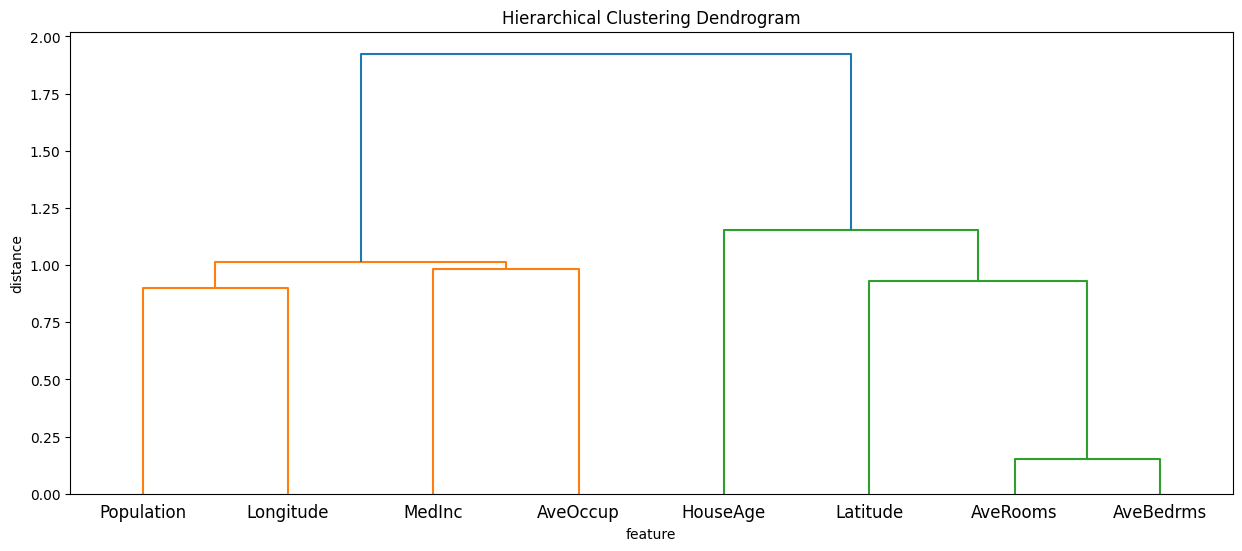

In [8]:
partition_tree = shap.utils.partition_tree(X)
plt.figure(figsize=(15, 6))
sp.cluster.hierarchy.dendrogram(partition_tree, labels=X.columns)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("feature")
plt.ylabel("distance")
plt.show()

## Explain the instance

In [10]:
#  partition_hierarchy = {
#     'cluster_12': {
#         'cluster_11': {
#             'AveOccup': 'AveOccup',
#                   'cluster_plus1': {
#                       'MedInc': 'MedInc'}
#         },
#         'cluster_9': {
#             'Longitude': 'Longitude',
#                    'cluster_plus2':{
#             'Population': 'Population'}
#         }
#     },
#     'cluster_13': {
#         'HouseAge': 'HouseAge',
#         'cluster_10': {
#             'Latitude': 'Latitude',
#             'cluster_8': {
#                 'AveBedrms': 'AveBedrms',
#                 'AveRooms': 'AveRooms'
#             }
#         }
#     }
# }

partition_hierarchy = {
            'AveOccup': 'AveOccup',
            'MedInc': 'MedInc',
            'Longitude': 'Longitude',
            'Population': 'Population',
            'HouseAge': 'HouseAge',
            'Latitude': 'Latitude',
            'AveBedrms': 'AveBedrms',
            'AveRooms': 'AveRooms'
}


In [11]:
# build a masker from partition tree
masker = shap.maskers.Partition(X, clustering=partition_tree)
partition_masker = shap.maskers.Partition(X)

# build explainer objects
#raw_explainer = shap.PartitionExplainer(model.predict, X) # we can make this syntax supportable setting the clustering method as baseline
masker_explainer = shap.PartitionExplainer(model.predict, masker)
partition_explainer = shap.PartitionExplainer(model.predict, partition_masker, partition_tree=partition_hierarchy)

# compute SHAP values
#raw_winter_values = raw_explainer(instance)
masker_winter_values = masker_explainer(instance)
partition_winter_values = partition_explainer(instance)

normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.0078125
normalisation 0.

In [12]:
# comparison the masker and the original data sizes
print(f"X size: {sys.getsizeof(X)/1024:.2f} kB")
print(f"masker size: {sys.getsizeof(masker)} B")

X size: 1290.16 kB
masker size: 56 B


In [13]:
model.predict(instance)

array([4.4311104], dtype=float32)

## Compare to Tree SHAP

In [15]:
exact_explainer = shap.ExactExplainer(model.predict, X)
exact_shap_values = exact_explainer(instance)

[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]
[0.125      0.01785714 0.00595238 0.00357143 0.00357143 0.00595238
 0.01785714 0.125     ]

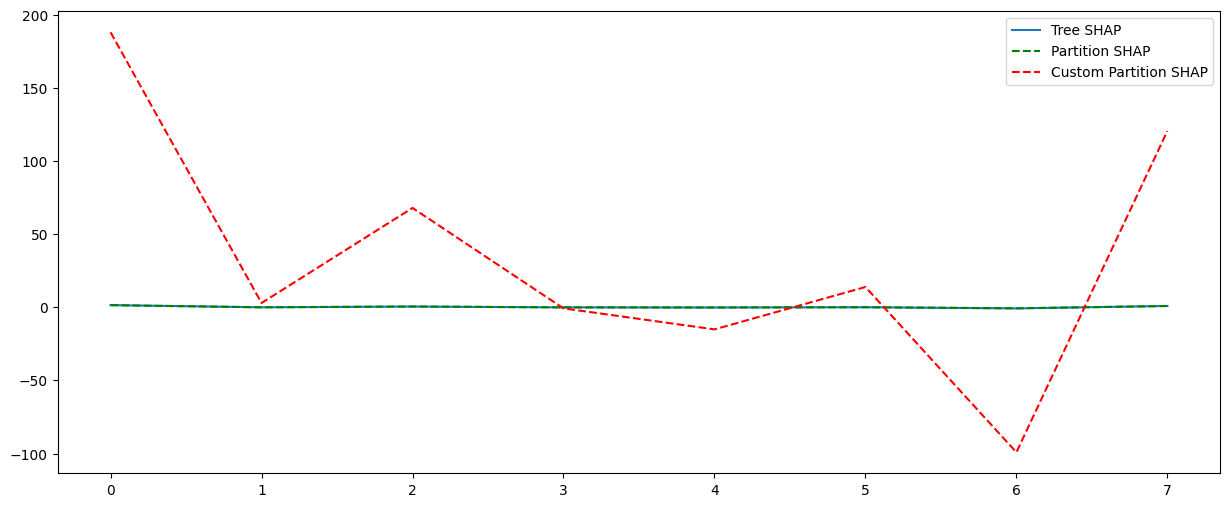

In [16]:
tree_explainer = shap.TreeExplainer(model, X)
tree_shap_values = tree_explainer(instance)

plt.figure(figsize=(15, 6))
plt.plot(tree_shap_values[0].values, label="Tree SHAP")
plt.plot(masker_winter_values[0].values, "g--", label="Partition SHAP")
plt.plot(partition_winter_values[0].values, "r--", label="Custom Partition SHAP")

plt.legend()
plt.show()

Partition SHAP values using a partition tree are nice estimation of SHAP values. The partition tree is a good way to reduce the number of input features and speed up the computation.

## Plots to explain the instance

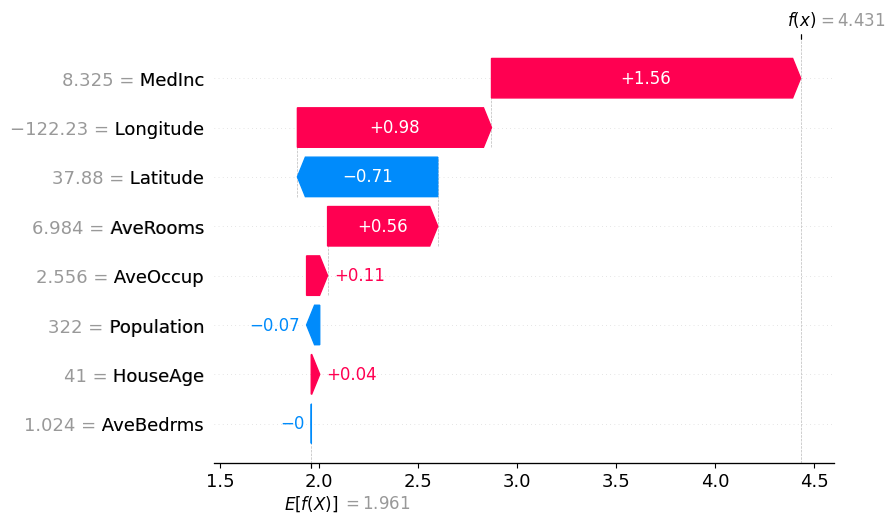

In [19]:
shap.plots.waterfall(exact_shap_values[0])

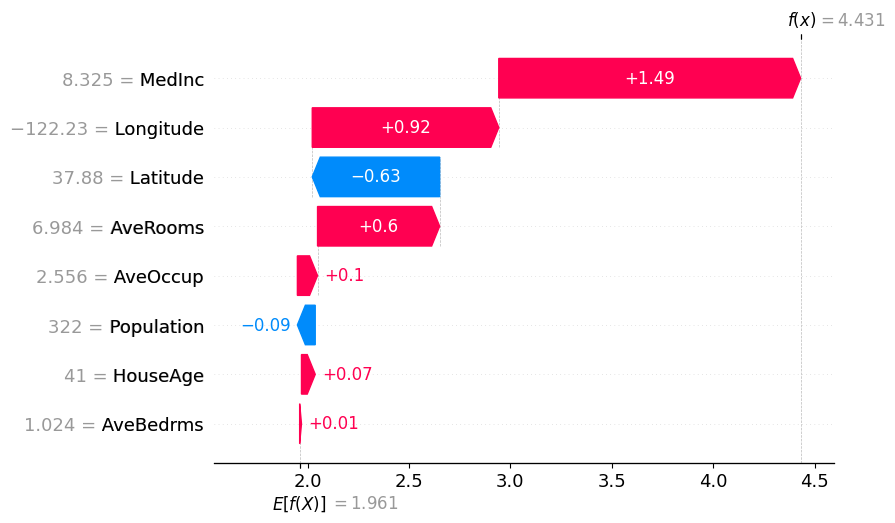

In [20]:
shap.plots.waterfall(masker_winter_values[0])

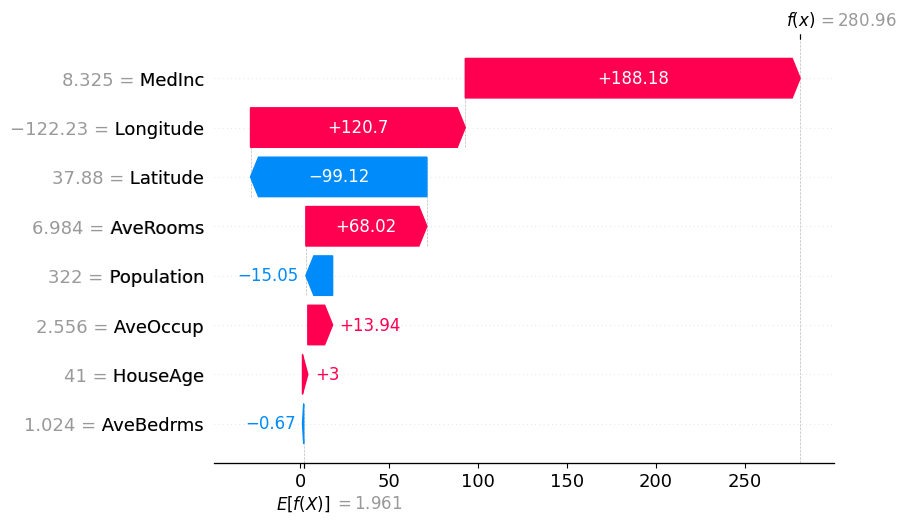

In [21]:
shap.plots.waterfall(partition_winter_values[0])

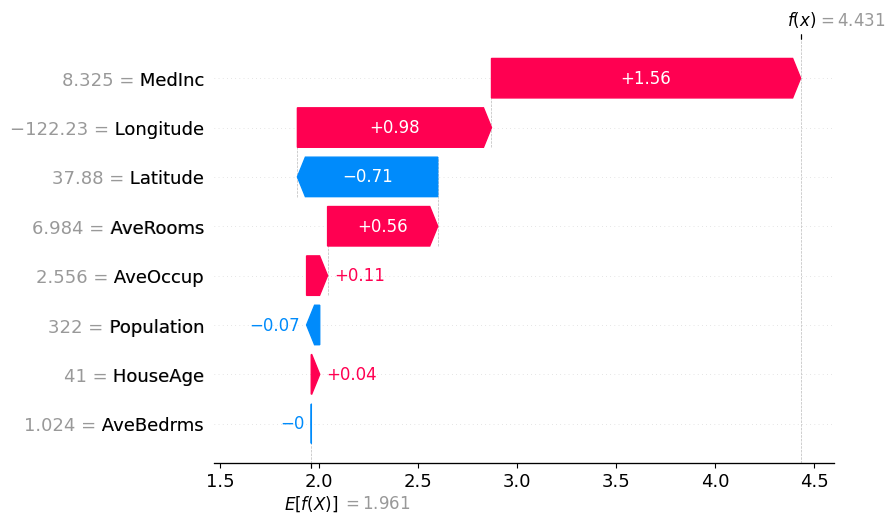

In [22]:
shap.plots.waterfall(tree_shap_values[0])

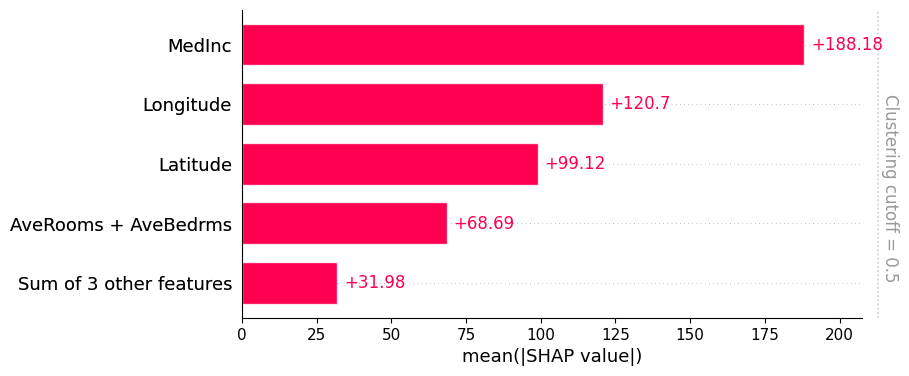

In [23]:
# Assuming the 'bar' function from your code is already defined, use it with the computed SHAP values
shap.plots.bar(partition_winter_values, max_display=5, clustering=partition_tree, show=True)


NameError: name 'dendrogram_coords' is not defined

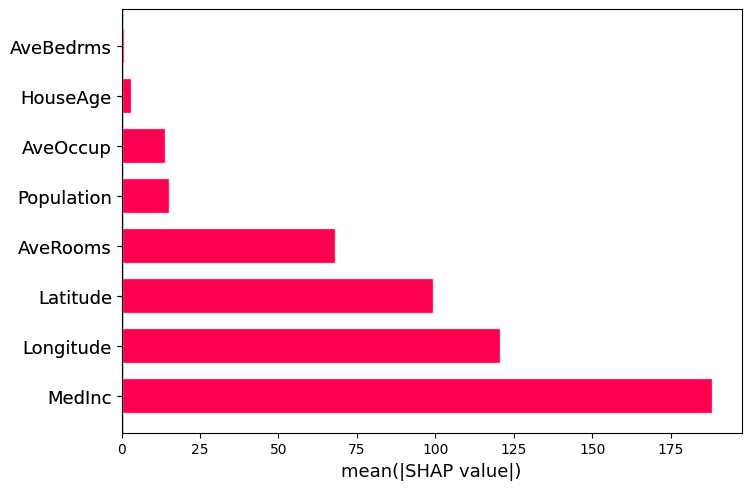

In [24]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.cluster.hierarchy import cophenet, fcluster

def bar_shap_values_clustering(shap_values, max_display=10, clustering=None, clustering_cutoff=0.5, show=True):
    if isinstance(shap_values, shap.Explanation):
        cohorts = {"": shap_values}
    elif isinstance(shap_values, shap.Cohorts):
        cohorts = shap_values.cohorts
    elif isinstance(shap_values, dict):
        cohorts = shap_values
    else:
        raise TypeError("The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!")

    cohort_labels = list(cohorts.keys())
    cohort_exps = list(cohorts.values())

    for i, exp in enumerate(cohort_exps):
        if not isinstance(exp, shap.Explanation):
            raise TypeError("The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!")

        if len(exp.shape) == 2:
            cohort_exps[i] = exp.abs.mean(0)
        if cohort_exps[i].shape != cohort_exps[0].shape:
            raise DimensionError("When passing several Explanation objects, they must all have the same number of feature columns!")

    features = cohort_exps[0].display_data if cohort_exps[0].display_data is not None else cohort_exps[0].data
    feature_names = cohort_exps[0].feature_names
    partition_tree = clustering if clustering is not None else getattr(cohort_exps[0], "clustering", None)

    values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])

    if len(values[0]) == 0:
        raise ValueError("The passed Explanation is empty, so there is nothing to plot.")

    if partition_tree is not None:
        if len(partition_tree.shape) != 2 or partition_tree.shape[1] != 4:
            raise TypeError("The clustering provided by the Explanation object does not seem to be a partition tree, which is all shap.plots.bar supports.")

    orig_inds = [[i] for i in range(len(values[0]))]
    orig_values = values.copy()

    if partition_tree is not None:
        dist = scipy.spatial.distance.squareform(cophenet(partition_tree))
        
        while len(values[0]) > max_display:
            merge_occurred = False
            for i in range(len(partition_tree)):
                if partition_tree[i, 2] <= clustering_cutoff:
                    ind1 = int(partition_tree[i, 0])
                    ind2 = int(partition_tree[i, 1])
                    
                    if ind1 < len(values[0]) and ind2 < len(values[0]):
                        for v in range(len(values)):
                            values[v, ind1] += values[v, ind2]
                        values = np.delete(values, ind2, axis=1)
                        orig_inds[ind1] += orig_inds[ind2]
                        del orig_inds[ind2]
                        merge_occurred = True
                        break

            if not merge_occurred:
                break

    feature_order = np.argsort(np.mean(np.abs(values), axis=0))
    feature_inds = feature_order[:max_display]
    y_pos = np.arange(len(feature_inds), 0, -1)
    feature_names_new = []

    for pos, inds in enumerate(orig_inds):
        if len(inds) == 1:
            feature_names_new.append(feature_names[inds[0]])
        else:
            full_print = " + ".join([feature_names[i] for i in inds])
            if len(full_print) <= 40:
                feature_names_new.append(full_print)
            else:
                max_ind = np.argmax(np.abs(orig_values).mean(0)[inds])
                feature_names_new.append(feature_names[inds[max_ind]] + " + %d other features" % (len(inds) - 1))
    feature_names = feature_names_new

    num_features = min(max_display, len(values[0]))

    if num_features < len(values[0]):
        num_cut = np.sum([len(orig_inds[feature_order[i]]) for i in range(num_features - 1, len(values[0]))])
        values[:, feature_order[num_features - 1]] = np.sum([values[:, feature_order[i]] for i in range(num_features - 1, len(values[0]))], 0)

    yticklabels = []
    for i in feature_inds:
        yticklabels.append(feature_names[i])
    if num_features < len(values[0]):
        yticklabels[-1] = "Sum of %d other features" % num_cut

    fig, ax = plt.subplots()
    row_height = 0.5
    fig.set_size_inches(8, num_features * row_height * np.sqrt(len(values)) + 1.5)

    ax.axvline(0, 0, 1, color="#000000", linestyle="-", linewidth=1, zorder=1)
    patterns = (None, '\\\\', '++', 'xx', '////', '*', 'o', 'O', '.', '-')
    total_width = 0.7
    bar_width = total_width / len(values)
    
    for i in range(len(values)):
        ypos_offset = -((i - len(values) / 2) * bar_width + bar_width / 2)
        ax.barh(
            y_pos + ypos_offset, values[i, feature_inds],
            bar_width, align='center',
            color=[shap.plots.colors.red_rgb if values[i, feature_inds[j]] > 0 else shap.plots.colors.blue_rgb for j in range(len(y_pos))],
            hatch=patterns[i], edgecolor=(1, 1, 1, 0.8), label=f"{cohort_labels[i]}"
        )

    ax.set_yticks(list(y_pos) + list(y_pos + 1e-8), yticklabels + [t.split('=')[-1] for t in yticklabels], fontsize=13)
    ax.set_xlabel("mean(|SHAP value|)", fontsize=13)
    
    if len(values) > 1:
        ax.legend(fontsize=12)

    tick_labels = ax.yaxis.get_majorticklabels()
    for i in range(num_features):
        tick_labels[i].set_color("#999999")

    if partition_tree is not None:
        feature_pos = np.argsort(feature_order)
        ylines, xlines = dendrogram_coords(feature_pos, partition_tree)
        xmin, xmax = ax.get_xlim()
        xlines_min, xlines_max = np.min(xlines), np.max(xlines)
        ct_line_pos = (clustering_cutoff / (xlines_max - xlines_min)) * 0.1 * (xmax - xmin) + xmax
        ax.text(
            ct_line_pos + 0.005 * (xmax - xmin), (y_pos[-1] - y_pos[0]) / 2, "Clustering cutoff = " + format_value(clustering_cutoff, '%0.02f'),
            horizontalalignment='left', verticalalignment='center', color="#999999", fontsize=12, rotation=-90
        )
        ax.axvline(ct_line_pos, color="#dddddd", dashes=(1, 1)).set_clip_on(False)

        for (xline, yline) in zip(xlines, ylines):
            if np.array(xline).max() <= clustering_cutoff and yline.max() < max_display:
                ax.plot(
                    (np.array(xline) / (xlines_max - xlines_min)) * 0.1 * (xmax - xmin) + xmax,
                    max_display - np.array(yline),
                    color="#999999"
                ).set_clip_on(False)

    plt.show() if show else plt.close()

# Usage example
bar_shap_values_clustering(partition_winter_values, max_display=10, clustering=partition_tree, clustering_cutoff=0.5, show=True)


In [ ]:
# Adjust the clustering cutoff value to see if it impacts feature merging
bar_shap_values_clustering(partition_winter_values, max_display=5, clustering=partition_tree, clustering_cutoff=0, show=True)
